TODO:
* experiment with narrower sampling of thetas / less trials / fixed presentation time
* analysis with train set / test set

In [1]:
%run experiment1.ipynb

Python implementation: CPython
Python version       : 3.13.2
IPython version      : 9.0.2

numpy       : 2.2.4
MotionClouds: unknown
manim       : 0.19.0
pandas      : 2.2.3
matplotlib  : 3.10.1
scipy       : 1.15.2

Compiler    : Clang 16.0.0 (clang-1600.0.26.6)
OS          : Darwin
Release     : 24.3.0
Machine     : arm64
Processor   : arm
CPU cores   : 10
Architecture: 64bit

Hostname: obiwan.local



## accuracy per session

In [2]:
# df = df.iloc[1:]
# df = df.reset_index(drop=True)
df

,success,timeout,failed_images,failed_audio,failed_video,trial_type,trial_index,time_elapsed,internal_node_id,rt,stimulus,keyboard_response,swipe_response,response_source
0,1.0,0.0,[],[],[],preload,0,172,0.0-0.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,image-swipe-response,1,1335,0.0-1.0-0.0,908.0,img_pilot/0.png,arrowright,NaN,keyboard
2,NaN,NaN,NaN,NaN,NaN,image-swipe-response,2,2037,0.0-1.0-1.0,445.0,img_pilot/1.png,arrowleft,NaN,keyboard
3,NaN,NaN,NaN,NaN,NaN,image-swipe-response,3,2779,0.0-1.0-2.0,484.0,img_pilot/2.png,arrowright,NaN,keyboard
4,NaN,NaN,NaN,NaN,NaN,image-swipe-response,4,3394,0.0-1.0-3.0,356.0,img_pilot/3.png,arrowright,NaN,keyboard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,NaN,NaN,NaN,NaN,NaN,image-swipe-response,212,173079,0.0-1.0-211.0,458.0,img_pilot/211.png,arrowleft,NaN,keyboard
213,NaN,NaN,NaN,NaN,NaN,image-swipe-response,213,173904,0.0-1.0-212.0,567.0,img_pilot/212.png,arrowright,NaN,keyboard
214,NaN,NaN,NaN,NaN,NaN,image-swipe-response,214,174684,0.0-1.0-213.0,527.0,img_pilot/213.png,arrowleft,NaN,keyboard
215,NaN,NaN,NaN,NaN,NaN,image-swipe-response,215,175444,0.0-1.0-214.0,503.0,img_pilot/214.png,arrowright,NaN,keyboard


In [3]:
df['trial_type']=='image-swipe-response'

0      False
1       True
2       True
3       True
4       True
       ...  
212     True
213     True
214     True
215     True
216     True
Name: trial_type, Length: 217, dtype: bool

In [4]:
df[df['trial_type']=='image-swipe-response']

,success,timeout,failed_images,failed_audio,failed_video,trial_type,trial_index,time_elapsed,internal_node_id,rt,stimulus,keyboard_response,swipe_response,response_source
1,NaN,NaN,NaN,NaN,NaN,image-swipe-response,1,1335,0.0-1.0-0.0,908.0,img_pilot/0.png,arrowright,NaN,keyboard
2,NaN,NaN,NaN,NaN,NaN,image-swipe-response,2,2037,0.0-1.0-1.0,445.0,img_pilot/1.png,arrowleft,NaN,keyboard
3,NaN,NaN,NaN,NaN,NaN,image-swipe-response,3,2779,0.0-1.0-2.0,484.0,img_pilot/2.png,arrowright,NaN,keyboard
4,NaN,NaN,NaN,NaN,NaN,image-swipe-response,4,3394,0.0-1.0-3.0,356.0,img_pilot/3.png,arrowright,NaN,keyboard
5,NaN,NaN,NaN,NaN,NaN,image-swipe-response,5,4156,0.0-1.0-4.0,504.0,img_pilot/4.png,arrowright,NaN,keyboard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,NaN,NaN,NaN,NaN,NaN,image-swipe-response,212,173079,0.0-1.0-211.0,458.0,img_pilot/211.png,arrowleft,NaN,keyboard
213,NaN,NaN,NaN,NaN,NaN,image-swipe-response,213,173904,0.0-1.0-212.0,567.0,img_pilot/212.png,arrowright,NaN,keyboard
214,NaN,NaN,NaN,NaN,NaN,image-swipe-response,214,174684,0.0-1.0-213.0,527.0,img_pilot/213.png,arrowleft,NaN,keyboard
215,NaN,NaN,NaN,NaN,NaN,image-swipe-response,215,175444,0.0-1.0-214.0,503.0,img_pilot/214.png,arrowright,NaN,keyboard


In [5]:
np.array(df[df['trial_type']=='image-swipe-response']['time_elapsed'])[-1]

np.int64(176275)

In [6]:
df_data = df[df['trial_type']=='image-swipe-response'][['trial_index', 'stimulus', 'swipe_response', 'keyboard_response', 'rt', 'response_source']]
df_data = df_data.reset_index(drop=True)
df_data

,trial_index,stimulus,swipe_response,keyboard_response,rt,response_source
0,1,img_pilot/0.png,NaN,arrowright,908.0,keyboard
1,2,img_pilot/1.png,NaN,arrowleft,445.0,keyboard
2,3,img_pilot/2.png,NaN,arrowright,484.0,keyboard
3,4,img_pilot/3.png,NaN,arrowright,356.0,keyboard
4,5,img_pilot/4.png,NaN,arrowright,504.0,keyboard
...,...,...,...,...,...,...
211,212,img_pilot/211.png,NaN,arrowleft,458.0,keyboard
212,213,img_pilot/212.png,NaN,arrowright,567.0,keyboard
213,214,img_pilot/213.png,NaN,arrowleft,527.0,keyboard
214,215,img_pilot/214.png,NaN,arrowright,503.0,keyboard


In [7]:
parameters

,i_trial,theta,B_theta,i_B_theta,B_sf,seed,fname
0,0,0.392699,0.116355,0,0.1,2024,img_pilot_folder/0.png
1,1,-0.249899,0.465421,3,0.1,2025,img_pilot_folder/1.png
2,2,-0.107100,1.047198,8,0.1,2026,img_pilot_folder/2.png
3,3,0.321299,0.698132,5,0.1,2027,img_pilot_folder/3.png
4,4,0.178500,0.581776,4,0.1,2028,img_pilot_folder/4.png
...,...,...,...,...,...,...,...
211,211,0.178500,0.698132,5,0.1,2235,img_pilot_folder/211.png
212,212,-0.392699,1.047198,8,0.1,2236,img_pilot_folder/212.png
213,213,-0.178500,0.581776,4,0.1,2237,img_pilot_folder/213.png
214,214,-0.392699,0.349066,2,0.1,2238,img_pilot_folder/214.png


In [8]:
df_data = pd.concat([df_data, parameters], axis=1)
df_data

,trial_index,stimulus,swipe_response,keyboard_response,rt,response_source,i_trial,theta,B_theta,i_B_theta,B_sf,seed,fname
0,1,img_pilot/0.png,NaN,arrowright,908.0,keyboard,0,0.392699,0.116355,0,0.1,2024,img_pilot_folder/0.png
1,2,img_pilot/1.png,NaN,arrowleft,445.0,keyboard,1,-0.249899,0.465421,3,0.1,2025,img_pilot_folder/1.png
2,3,img_pilot/2.png,NaN,arrowright,484.0,keyboard,2,-0.107100,1.047198,8,0.1,2026,img_pilot_folder/2.png
3,4,img_pilot/3.png,NaN,arrowright,356.0,keyboard,3,0.321299,0.698132,5,0.1,2027,img_pilot_folder/3.png
4,5,img_pilot/4.png,NaN,arrowright,504.0,keyboard,4,0.178500,0.581776,4,0.1,2028,img_pilot_folder/4.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,212,img_pilot/211.png,NaN,arrowleft,458.0,keyboard,211,0.178500,0.698132,5,0.1,2235,img_pilot_folder/211.png
212,213,img_pilot/212.png,NaN,arrowright,567.0,keyboard,212,-0.392699,1.047198,8,0.1,2236,img_pilot_folder/212.png
213,214,img_pilot/213.png,NaN,arrowleft,527.0,keyboard,213,-0.178500,0.581776,4,0.1,2237,img_pilot_folder/213.png
214,215,img_pilot/214.png,NaN,arrowright,503.0,keyboard,214,-0.392699,0.349066,2,0.1,2238,img_pilot_folder/214.png


In [9]:
(df_data['swipe_response'] == 'right') + (df_data['keyboard_response'] == 'arrowright')

0       True
1      False
2       True
3       True
4       True
       ...  
211    False
212     True
213    False
214     True
215     True
Length: 216, dtype: bool

In [10]:
correct = np.array((parameters['theta'] > 0) == ((df_data['swipe_response'] == 'right') + (df_data['keyboard_response'] == 'arrowright')))
correct.mean()

np.float64(0.7685185185185185)

In [11]:
for fname in filenames_valid:

    df = pd.read_json(fname)
    df_data = df[df['trial_type']=='image-swipe-response'][['trial_index', 'stimulus', 'swipe_response', 'keyboard_response', 'rt', 'response_source']]
    df_data = df_data.reset_index(drop=True)
    df_data = pd.concat([df_data, parameters], axis=1)
    correct = np.array((df_data['theta'] > 0) == ((df_data['swipe_response'] == 'right') + (df_data['keyboard_response'] == 'arrowright')))
    print(f'{fname}: accuracy = {correct.mean()*100:.1f}%')
    # print(df)

osfstorage-archive/pilot-apagrpwbxf-data.json: accuracy = 84.7%
osfstorage-archive/pilot-w87npww874-data.json: accuracy = 86.6%
osfstorage-archive/pilot-64dtdq27os-data.json: accuracy = 77.8%
osfstorage-archive/pilot-w2oz9j2a3v-data.json: accuracy = 75.5%
osfstorage-archive/pilot-wsumnmxd8c-data.json: accuracy = 87.5%
osfstorage-archive/pilot-rtumbda4hz-data.json: accuracy = 81.5%
osfstorage-archive/pilot-ybaxemnk16-data.json: accuracy = 89.4%
osfstorage-archive/pilot-6l605rv4nn-data.json: accuracy = 74.5%
osfstorage-archive/pilot-t7vs2ac7eg-data.json: accuracy = 87.5%
osfstorage-archive/pilot-0ck7pzlpvw-data.json: accuracy = 83.3%
osfstorage-archive/pilot-64jgewoyyw-data.json: accuracy = 84.3%
osfstorage-archive/pilot-39dqyx1uj0-data.json: accuracy = 85.2%
osfstorage-archive/pilot-wtlob6kr2e-data.json: accuracy = 76.9%
osfstorage-archive/pilot-w18ho6kpvx-data.json: accuracy = 80.6%
osfstorage-archive/pilot-rxysu10cka-data.json: accuracy = 86.6%
osfstorage-archive/pilot-bxne598kx7-data

## accuracy per B_theta

In [12]:
B_thetas = np.sort(np.array(parameters['B_theta'].unique()))
B_thetas

array([0.11635528, 0.23271057, 0.34906585, 0.46542113, 0.58177642,
       0.6981317 , 0.81448698, 0.93084227, 1.04719755])

In [13]:
results = pd.DataFrame(columns=['session', 'B_theta_deg', 'accuracy'])
for fname in filenames_valid:
    # shorten the name
    session = fname.replace(f'osfstorage-archive/{experiment_name}-', '').replace('-data.json', '')
    # create the dataframe
    df = pd.read_json(fname)
    df_data = df[df['trial_type']=='image-swipe-response'][['trial_index', 'stimulus', 'swipe_response', 'keyboard_response', 'rt', 'response_source']]
    df_data = df_data.reset_index(drop=True)
    df_data = pd.concat([df_data, parameters], axis=1)

    for B_theta in B_thetas:
        df_data_ =  df_data[df_data['B_theta'] == B_theta]
        correct = np.array((df_data_['theta'] > 0) == ((df_data_['swipe_response'] == 'right') + (df_data_['keyboard_response'] == 'arrowright')))
        # results_['accuracy'] = correct.mean()
        # print(f'{fname}: {B_theta=:.1f} - accuracy = {correct.mean()*100:.1f}%')
        # print(df)
        # results = results.append(results_, ignore_index=True)
        results.loc[len(results)] = [session, B_theta*180/np.pi, correct.mean()]
results        


,session,B_theta_deg,accuracy
0,apagrpwbxf,6.666667,0.958333
1,apagrpwbxf,13.333333,0.958333
2,apagrpwbxf,20.000000,1.000000
3,apagrpwbxf,26.666667,0.916667
4,apagrpwbxf,33.333333,0.875000
...,...,...,...
283,ck6rohvg0h,33.333333,0.916667
284,ck6rohvg0h,40.000000,0.750000
285,ck6rohvg0h,46.666667,0.708333
286,ck6rohvg0h,53.333333,0.500000


In [14]:
results.groupby('B_theta_deg')

,B_theta_deg,accuracy
0,6.666667,0.958333
1,13.333333,0.925781
2,20.000000,0.928385
3,26.666667,0.894531
4,33.333333,0.865885
5,40.000000,0.820312
6,46.666667,0.743490
7,53.333333,0.686198
8,60.000000,0.632812


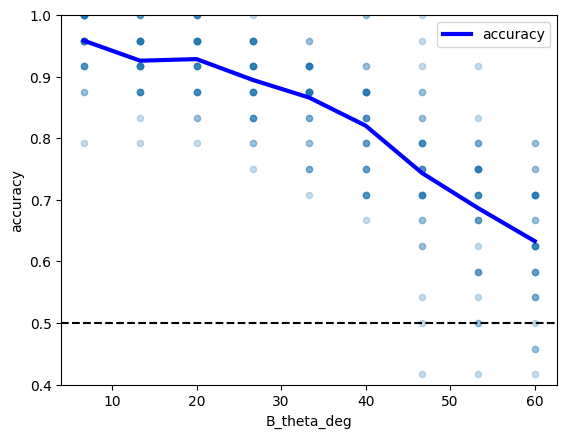

In [ ]:
fig, ax = plt.subplots()
results.plot.scatter(x='B_theta_deg', y='accuracy', ax=ax, alpha=.25)
mean_accuracy_per_B_theta = results.groupby('B_theta_deg')['accuracy'].mean().reset_index()
mean_accuracy_per_B_theta.plot(x='B_theta_deg', y='accuracy', ax=ax, color='b', lw=3)
ax.axhline(.5, color='k', linestyle='--')
ax.set_ylim(.4, 1)
mean_accuracy_per_B_theta

In [16]:
from scipy import stats
# stats.ttest_1samp?

In [17]:
for B_theta in results['B_theta_deg'].unique():
    # print(B_theta, results[results['B_theta_deg'] == B_theta]['accuracy'])
    print(B_theta, stats.ttest_1samp(results[results['B_theta_deg'] == B_theta]['accuracy'], popmean=.5))    

6.666666668598186 TtestResult(statistic=np.float64(53.4593748738681), pvalue=np.float64(4.2628378162235587e-32), df=np.int64(31))
13.333333331466793 TtestResult(statistic=np.float64(48.81631970697917), pvalue=np.float64(6.902070580223996e-31), df=np.int64(31))
20.00000000006498 TtestResult(statistic=np.float64(43.876103402640446), pvalue=np.float64(1.8010124296530485e-29), df=np.int64(31))
26.66666666866316 TtestResult(statistic=np.float64(37.28761056060046), pvalue=np.float64(2.5492814803450044e-27), df=np.int64(31))
33.333333331531776 TtestResult(statistic=np.float64(33.18313664807425), pvalue=np.float64(8.693333503481602e-26), df=np.int64(31))
40.00000000012996 TtestResult(statistic=np.float64(21.49576656682814), pvalue=np.float64(3.483613540228413e-20), df=np.int64(31))
46.66666666872814 TtestResult(statistic=np.float64(11.280494661471597), pvalue=np.float64(1.6720344680964163e-12), df=np.int64(31))
53.333333331596755 TtestResult(statistic=np.float64(9.855078274438602), pvalue=np.f